In [7]:
import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/raw/Emotion_final.csv
../data/raw/text_emotion.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Importation de la donnée
data = pd.read_csv('../data/raw/text_emotion.csv')

In [10]:
data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [11]:
# Récupération du texte
sentences = data['content'].values

In [12]:
sentences

array(['@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[',
       'Layin n bed with a headache  ughhhh...waitin on your call...',
       'Funeral ceremony...gloomy friday...', ...,
       "Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!",
       '@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!',
       '@mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla'],
      dtype=object)

In [13]:
wordlist = []

In [14]:
for id in range(len(sentences)):
    wordlist += sentences[id].split()

In [15]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [16]:
for word in list(wordlist):
    if word in stopwords:
        wordlist.remove(word)

In [17]:
stopwords2 = [",", "im", "ive", "m"]

In [18]:
for word in list(wordlist):
    if word in stopwords2:
        wordlist.remove(word)

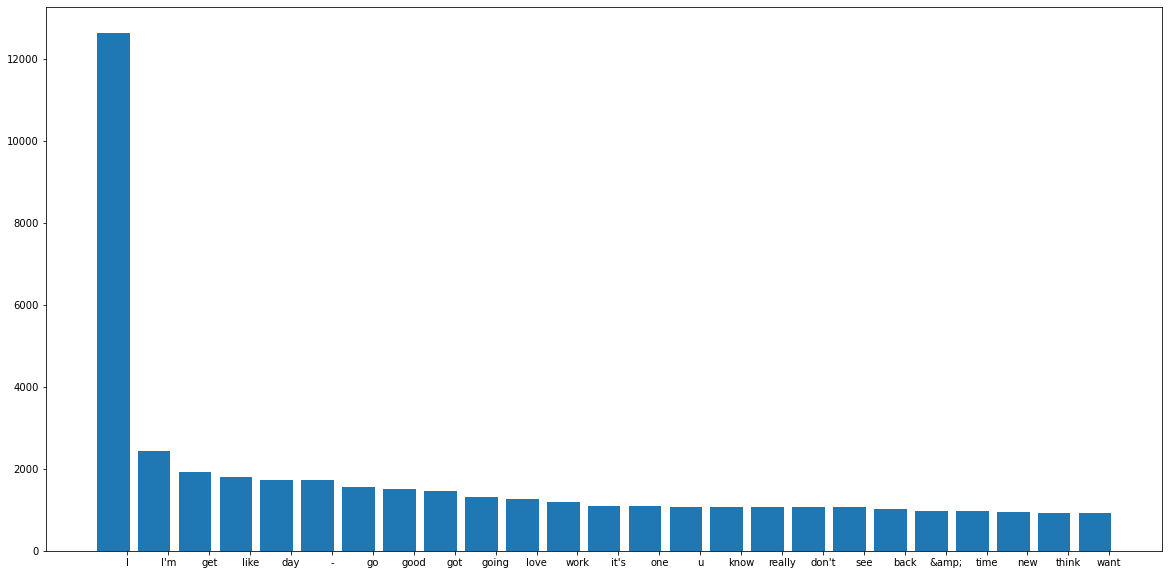

In [19]:
from collections import Counter
counts = dict(Counter(wordlist).most_common(25))

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)

fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()


In [20]:
plt.savefig('../assets/data_world_word_frequency.png')

<Figure size 432x288 with 0 Axes>